In [1]:
# **************************************************
# 1. Se crea un corpus de frases de ejemplo.
# **************************************************
corpus = ["Me pones un pincho de tortilla, por favor?",
          "quiero una pizza margherita"]

In [2]:
# **************************************************
# 2. Después, se debe entrenar un tagger para el español.
# **************************************************
from nltk.corpus import cess_esp

sents = cess_esp.tagged_sents()

training = []
test = []
for i in range(len(sents)):
    if i % 10:
        training.append(sents[i])
    else:
        test.append(sents[i])
        
#from nltk import UnigramTagger, BigramTagger, TrigramTagger, DefaultTagger
from nltk.tag.hmm import HiddenMarkovModelTagger

#default_tagger = DefaultTagger ('NLTK_FASHION')
#unigram_tagger = UnigramTagger(training, backoff=default_tagger)
#bigram_tagger = BigramTagger(training, backoff=unigram_tagger)
#trigram_tagger = TrigramTagger(training, backoff=bigram_tagger)
#hmm tagger
spanish_pos_tagger = HiddenMarkovModelTagger.train(training)

In [47]:
# **************************************************
# 3. Ahora, se debe construir un Regex Parser que detecte comidas y cantidades.
# **************************************************

grammar = r""" 

  pedido: {<Z|di0fs0|dn0cp0><ncmp000|ncfs000>}

"""

import nltk
regex_parser = nltk.RegexpParser(grammar)

[('quisiera', 'da0mp0'), ('1', 'Z'), ('bocadillo', 'ncmp000'), ('de', 'sps00'), ('tortilla', 'ncfs000')]


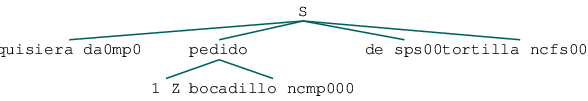

In [48]:
# **************************************************
# 4. Se usa el pos tagger y el Regex Parser para obtener las IOB de una nueva frase.
# **************************************************

sentence = "quisiera 1 bocadillo de tortilla"

#sentence = "me gustaría tomar una pizza margherita"

#sentence = "quiero 3 bocadillos de anchoas y 2 pizzas"

#sentence = "quiero tres bocadillos de anchoas y dos pizzas"

sentence_tokens = nltk.word_tokenize(sentence)

tagged_sentence = spanish_pos_tagger.tag(sentence_tokens)

print(tagged_sentence)

regex_parser.parse(tagged_sentence)

Con estos pasos, ya tendríamos cubierta la versión básica de la práctica.
No obstante, por último, se sugiere al alumno que use el pos tagger y el Regex Parser para crear un corpus IOB que sirva para entrenar los bigram taggers o el NaiveBayesClassifier:
parsedCorpus = []
for sentence in corpus:
        sentence_tokens = ….tokenize(sentence)

        tagged_sentence = spanish_pos_tagger.tag(sentence_tokens)

        …….

        print(token,IOB_tag)
Los códigos de los algoritmos Unigram, Bigram y NaiveBayes los podemos encontrar en el capítulo 7 del libro de NLTK: Steven Bird, Ewan Klein and Edward Loper. “7. Extracting Information from Text”. Natural Language Processing with Python. [En línea] URL disponible en: http://www.nltk.org/book/ch07.html

In [ ]:
print ('Acierto con HMMs:', spanish_pos_tagger.evaluate(test)*100)